In [2]:
%matplotlib notebook
%matplotlib inline
%pylab inline
import numpy as np
import numpy as np
import matplotlib
import matplotlib.animation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import scipy.stats as sp


Populating the interactive namespace from numpy and matplotlib


## Data Simulation scenario I: For LS classification

1. 2 classes - Blue and Orange, 100 points in each class
2. training data in each class generated from bivariate gaussian distributions with uncorrelated components and different means

$ X_{i} \sim BVN(\mu_{i}, \Sigma)$,
<br>
$i \in {1,2}$
<br>
$X_{blue} \sim BVN(\mu_{blue}, \Sigma)$
<br>
$X_{orange} \sim BVN(\mu_{orange}, \Sigma)$


In [8]:
# Inputs 
mu_blue = [2.0, 3.0]
mu_orange = [3.0, 2.0]
sigma = np.array([[2.0, 0.0], [0.0, 2.0]])
x_blue, y_blue = np.random.multivariate_normal(mu_blue, sigma, 100).T
x_orange, y_orange = np.random.multivariate_normal(mu_orange, sigma, 100).T

## Plot the generated data points

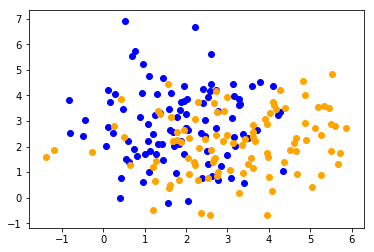

In [9]:
ax = plt.axes()
ax.scatter(x_blue, y_blue,  color='blue')
ax.scatter(x_orange, y_orange, color='orange')


## Plot decision boundary 

1. Obtain $\hat{\beta} = (X'X)^{-1}X'y$
<br>
2. Obtain $\hat{y} = X'\hat{\beta}$
<br>
3. Plot $\hat{y}$ versus X

In [40]:
# training data
X = np.concatenate((x_blue, x_orange), axis=0)
y = np.concatenate((y_blue, y_orange), axis=0)

# predict the value y_hat
beta_hat = 1/np.dot(X, np.transpose(X))*np.dot((np.transpose(X)), y)
print("Beta hat for the above least squares is:", beta_hat)
y_hat = X*beta_hat



Beta hat for the above least squares is: 0.7234194451392041


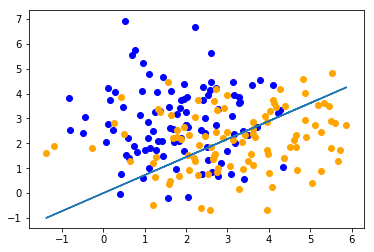

In [41]:
ax = plt.axes()
ax.scatter(x_blue, y_blue,  color='blue')
ax.scatter(x_orange, y_orange, color='orange')
ax.plot(X, y_hat)

## Data Simulation Scenario II: For NN Classification 
<br>
1. Choose an index i for each observation from the number of distributions 
<br>
2. Generate an observation from the chosen density 

In [77]:
# Set-up.
n = 100
# numpy.random.seed(0x5eed)
# Parameters of the mixture components
norm_params = np.array([[5.0, 1],
                        [1.0, 1.3],
                        [9.0, 1.3], 
                       [3.0, 1.2],
                       [4.0, 1.4]])
n_components = norm_params.shape[0]
# Weight of each component, in this case all of them are 1/3
weights = np.ones(n_components, dtype=np.float64) / float(n_components)
# A stream of indices from which to choose the component
mixture_idx_blue = numpy.random.choice(n_components, size=n, replace=True, p=weights)
mixture_idx_orange = numpy.random.choice(n_components, size=n, replace=True, p=weights)

In [79]:
## Generate x_nn and y_nn from mixture components for blue
x_nn_blue = []
y_nn_blue = []
for i in range(len(mixture_idx_blue)):
    j = mixture_idx_blue[i]
    x, y = np.random.normal(norm_params[j])
    x_nn_blue.append(x)
    y_nn_blue.append(y)
    
x_nn_blue = np.array(x_nn_blue)
y_nn_blue = np.array(y_nn_blue)

## Generate x_nn and y_nn from mixture components for orange
x_nn_or = []
y_nn_or = []
for i in range(len(mixture_idx_orange)):
    j = mixture_idx_orange[i]
    x, y = np.random.normal(norm_params[j])
    x_nn_or.append(x)
    y_nn_or.append(y)
    
x_nn_or = np.array(x_nn_or)
y_nn_or = np.array(y_nn_or)

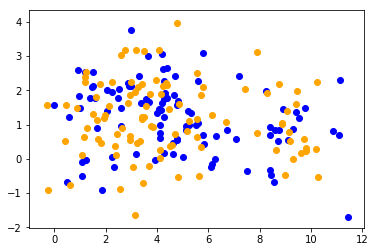

In [80]:
ax = plt.axes()
ax.scatter(x_nn_blue, y_nn_blue,  color='blue')
ax.scatter(x_nn_or, y_nn_or, color='orange')
